# Ajuste de Intensidad

## Carga de librerías

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

## Definición de funciones

In [2]:
def showImage(title="Image",image=None, size=10):
    h,w=image.shape
    aspect_ratio=w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

#Funcion para obtener los datos del histograma a base de sus niveles
def convertImageToHistogram(image=None):
    data=[0]*256
    h,w=image.shape
    for i in range(h):
        for j in range(w):
            data[image[i,j]]+=1
    return data

#Mostrar una imagen en un histograma
def showImageToHistogram(hist_image,x_image,label,title):
    fig, ax = plt.subplots(figsize=(10,5))
    # Crear una línea Line2D y añadirla a los ejes
    line = Line2D(x_image, hist_image, linewidth=2, linestyle='-', label=label)
    ax.add_line(line)
    # Configurar el gráfico
    ax.set_title(title)
    ax.set_xlabel('Intensidad')
    ax.set_ylabel('Cantidades')
    ax.legend()
    ax.autoscale(axis='x',tight=True)
    ax.autoscale(axis='y',tight=True)
    space=10
    ax.set_xlim([min(x_image) - space, max(x_image) + space])
    ax.set_ylim([min(hist_image) - space, max(hist_image) + space])
    # Mostrar el gráfico
    plt.show()

#Retorna un data frame con la información, se calcula todas las columnas para la ecualización
def getDataFrame(hist_image):
    fa_image=np.cumsum(hist_image)
    pdf_image=np.array(hist_image) / sum(hist_image)
    cdf_image=np.cumsum(pdf_image)
    cdf_x255_image=cdf_image*255
    equal_hist_image=np.trunc(cdf_x255_image).astype(np.uint8)
    data_image={'Intensidad':x_image,'Frecuencia':hist_image,'Frecuencia Acumulada':fa_image,
              'PDF':pdf_image,'CDF':cdf_image,'CDF X 255':cdf_x255_image,'Equal. Hist. Val':equal_hist_image}
    df_image=pd.DataFrame(data_image)
    return df_image

#remplaza los valores de la imagen real calculado del histograma
def replaceValues(image=None,df_image=None):
    new_image=image.copy()
    intensity = df_image['Intensidad'].values
    new_values = df_image['Equal. Hist. Val'].values
    masc = np.isin(new_image, intensity)
    ind = np.searchsorted(intensity, new_image[masc])
    new_image = new_image.copy()
    new_image[masc] = new_values[ind]
    return new_image

# Se compraran imagenes, se pone las 2 en la misma fila
def compareImages(image=None,newImage=None,title1='Imágen 01',title2='Imágen 02'):
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title(title1)
    axs[1].imshow(newImage, cmap='gray')
    axs[1].set_title(title2)
    plt.tight_layout()
    plt.show()


## Lectura de imágenes

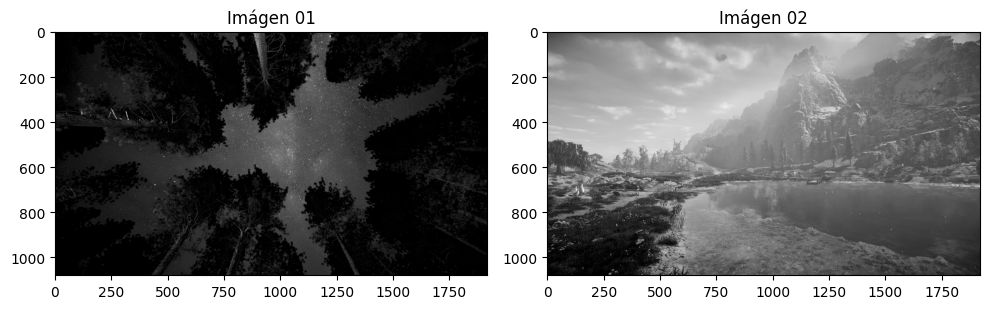

In [3]:
img01=cv.imread('image3.png',cv.IMREAD_GRAYSCALE)
img02=cv.imread('image4.png',cv.IMREAD_GRAYSCALE)
compareImages(img01,img02,'Imágen 01','Imágen 02')

## Obtenemos el histograma de las imágenes

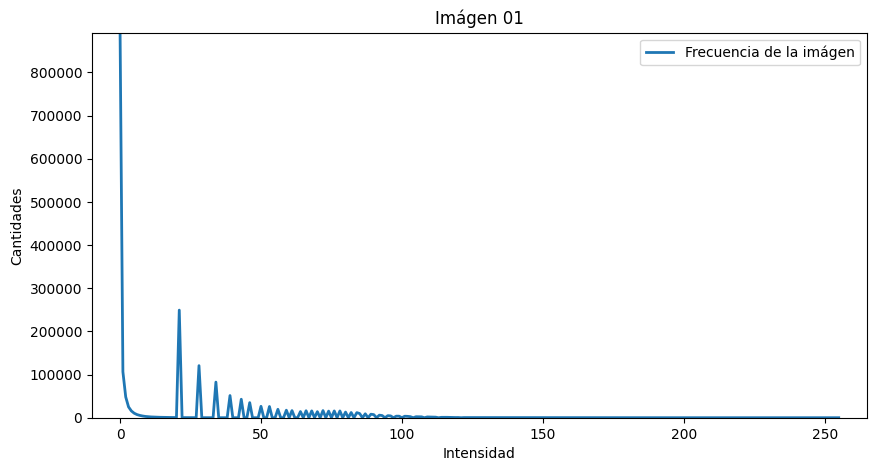

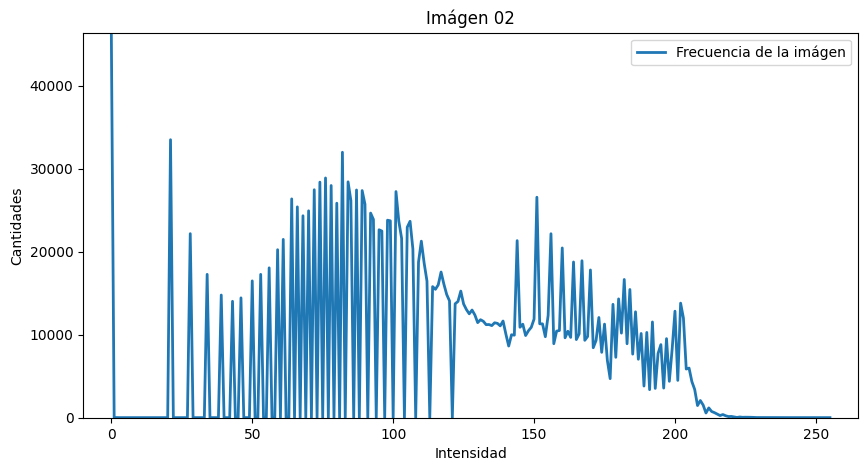

In [4]:
hist_image01=convertImageToHistogram(img01)
x_image = np.arange(256)
showImageToHistogram(hist_image01,x_image,'Frecuencia de la imágen','Imágen 01')
hist_image02=convertImageToHistogram(img02)
showImageToHistogram(hist_image02,x_image,'Frecuencia de la imágen','Imágen 02')

## Cálculos de los histogramas

In [5]:
df_image01=getDataFrame(hist_image01)
df_image02=getDataFrame(hist_image02)
df_image01

,Intensidad,Frecuencia,Frecuencia Acumulada,PDF,CDF,CDF X 255,Equal. Hist. Val
0,0,892153,892153,4.302435e-01,0.430244,109.712102,109
1,1,106438,998591,5.133005e-02,0.481574,122.801266,122
2,2,48128,1046719,2.320988e-02,0.504783,128.719784,128
3,3,25040,1071759,1.207562e-02,0.516859,131.799067,131
4,4,15708,1087467,7.575231e-03,0.524434,133.730751,133
...,...,...,...,...,...,...,...
251,251,0,2073599,0.000000e+00,1.000000,254.999877,254
252,252,1,2073600,4.822531e-07,1.000000,255.000000,255
253,253,0,2073600,0.000000e+00,1.000000,255.000000,255
254,254,0,2073600,0.000000e+00,1.000000,255.000000,255


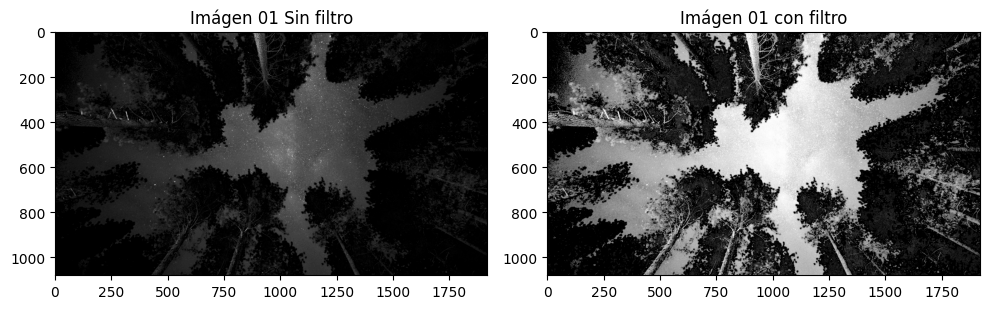

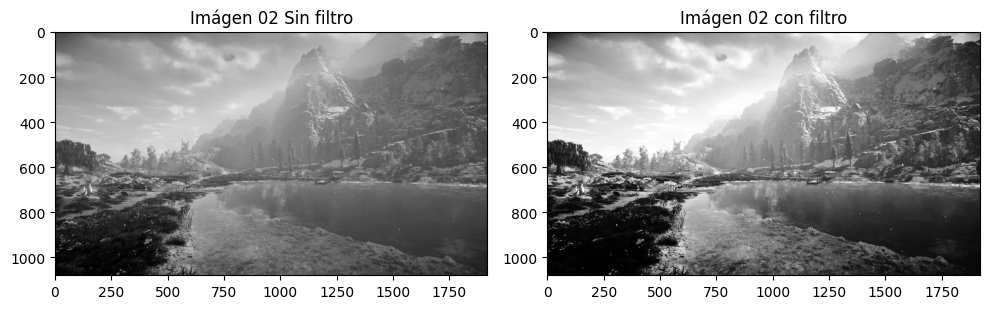

In [6]:
new_image01=replaceValues(img01,df_image01)
compareImages(img01,new_image01,'Imágen 01 Sin filtro','Imágen 01 con filtro')
new_image02=replaceValues(img02,df_image02)
compareImages(img02,new_image02,'Imágen 02 Sin filtro','Imágen 02 con filtro')

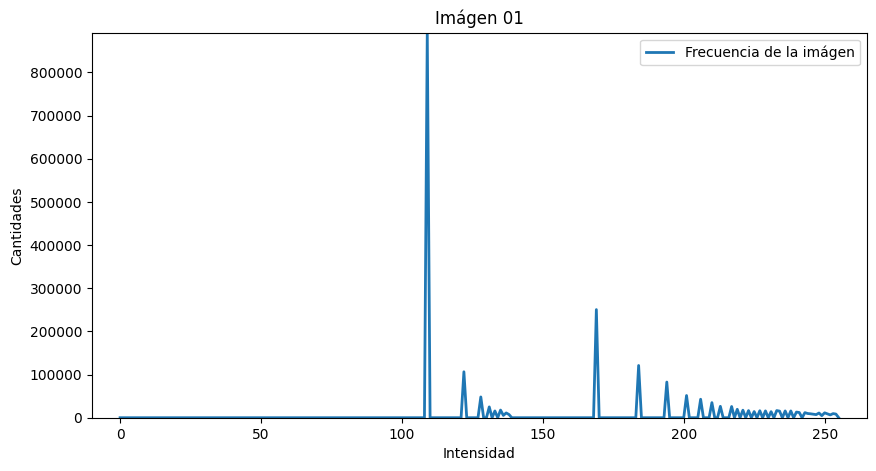

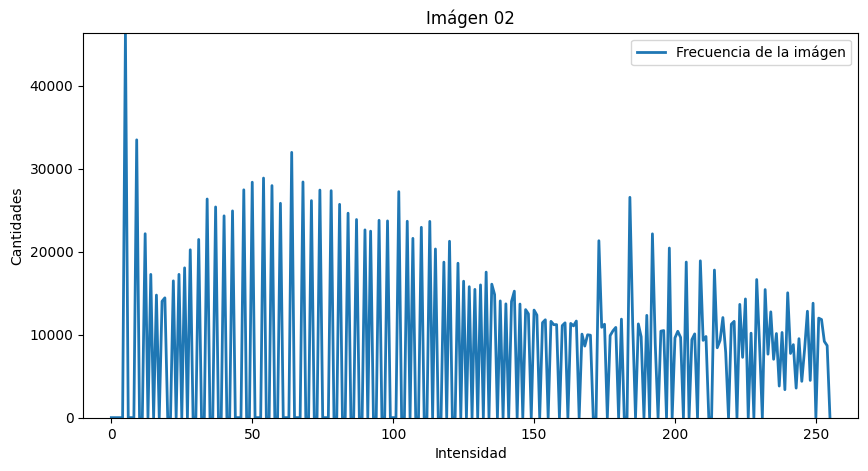

In [7]:
new_hist_image01=convertImageToHistogram(new_image01)
showImageToHistogram(new_hist_image01,x_image,'Frecuencia de la imágen','Imágen 01')
new_hist_image02=convertImageToHistogram(new_image02)
showImageToHistogram(new_hist_image02,x_image,'Frecuencia de la imágen','Imágen 02')

## Usando la librería

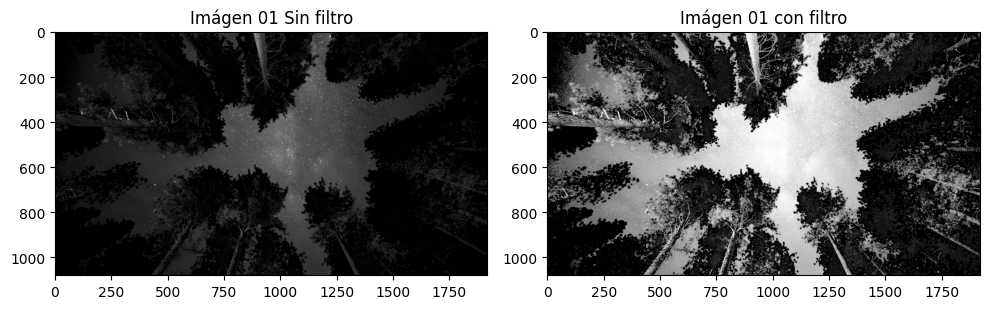

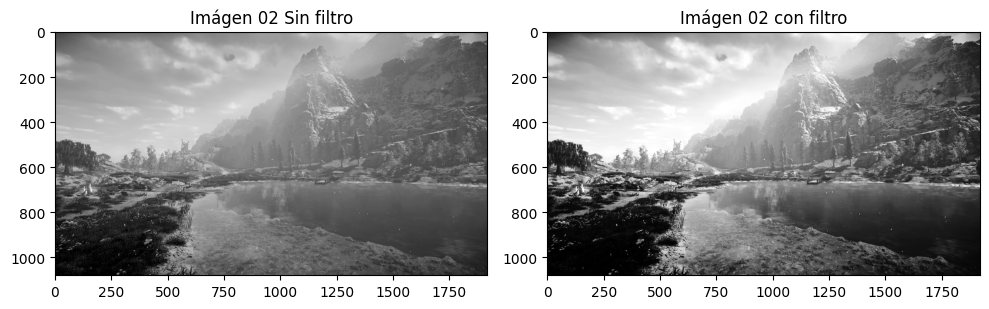

In [8]:
img01_eq_cv=cv.equalizeHist(img01)
compareImages(img01,img01_eq_cv,'Imágen 01 Sin filtro','Imágen 01 con filtro')
img02_eq_cv=cv.equalizeHist(img02)
compareImages(img02,img02_eq_cv,'Imágen 02 Sin filtro','Imágen 02 con filtro')

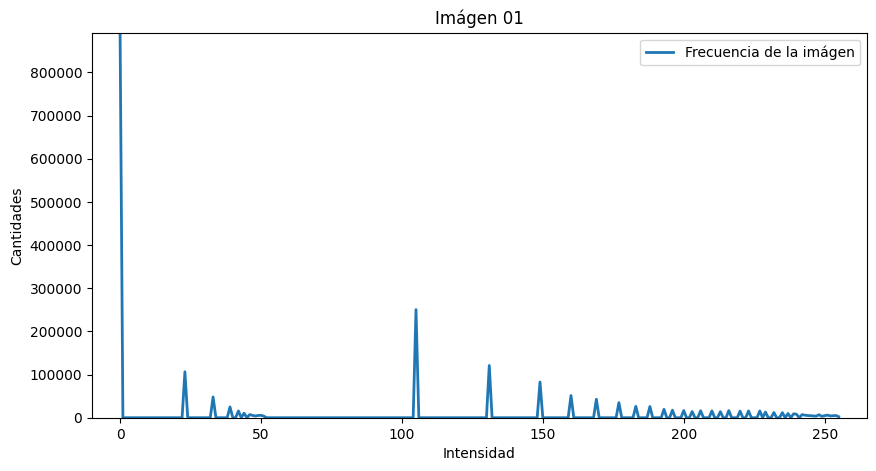

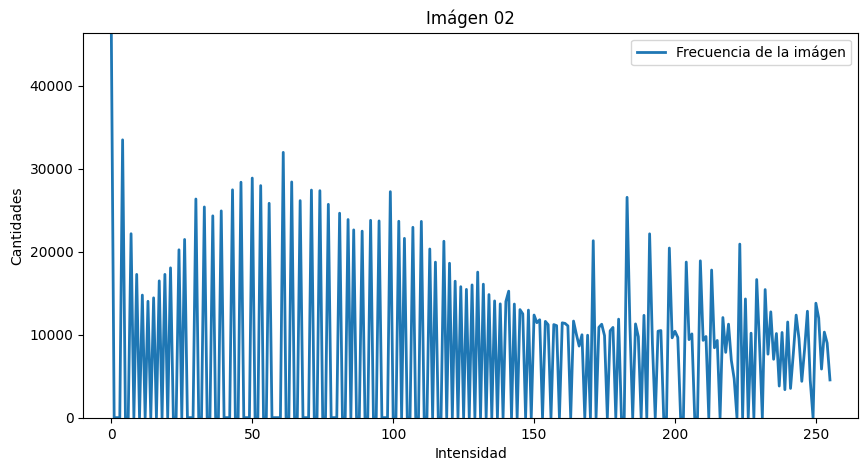

In [9]:
hist01 = cv.calcHist([img01_eq_cv], [0], None, [256], [0, 256])
showImageToHistogram(hist01,x_image,'Frecuencia de la imágen','Imágen 01')
hist02 = cv.calcHist([img02_eq_cv], [0], None, [256], [0, 256])
showImageToHistogram(hist02,x_image,'Frecuencia de la imágen','Imágen 02')

## Comparación

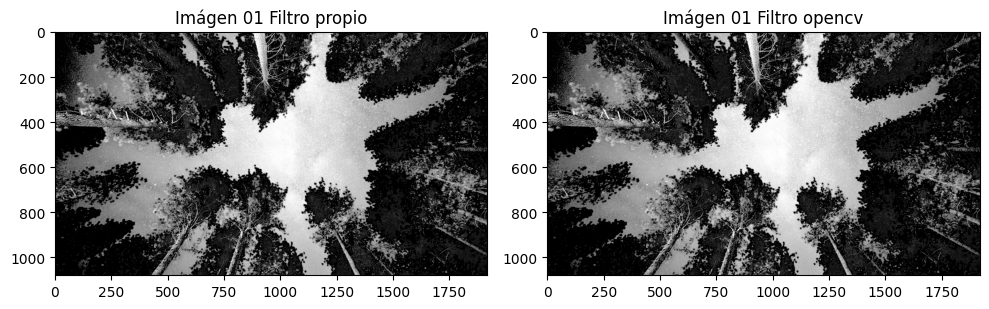

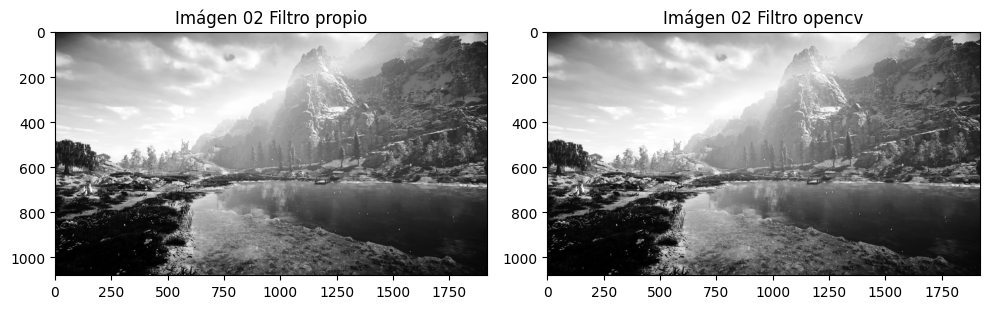

In [10]:
compareImages(new_image01,img01_eq_cv,'Imágen 01 Filtro propio','Imágen 01 Filtro opencv')
compareImages(new_image02,img02_eq_cv,'Imágen 02 Filtro propio','Imágen 02 Filtro opencv')

## Selección de la mejor técnica

Para este caso ambas imágenes de encuentran muy idénticas, ya que las tonalidades al ojo humano son muy idénticas utilizando la librería y el método elaborado. Hay pequeños cambios que se pueden apreciar cuando una imagen tiene un conjunto de datos muy distribuido en los extremos, al momento de compararlos el filtro propio arroja un tono mas intenso de negros, esto debido a que la librería toma en cuenta otros métodos estadísticos al momento de operar y hacer el cálculo de reasignación de valores el cual no se esta tomando en el método propio. Por lo cual la mejor solución es utilizar la **librería de open CV** para el cálculo y normalización del histograma. La documentación de OpenCV proporciona información detallada sobre el uso de la biblioteca (OpenCV, 2023).


## Caracteristicas

Una de las cosas que me di cuenta en el método propio es que si no se redondean bien los números varia mucho la manera en que se agregan los valores, estaba redondeando a 2 decimales y en lugar de truncar el numero al momento de calcular el histograma ecualizado me tiraba números completamente diferentes y la imagen ya no parecía lo inicial. 


Por estar utilizando imágenes en blanco y negro es más difícil en algunas imágenes que se encuentran en los extremos, es mas complicado ecualizarlo ya que no se distribuye uniformemente. 

## Referencias
OpenCV. (2023). \*OpenCV Documentation\*. Recuperado de https://docs.opencv.org/

Markdown Guide. (2023). \*Markdown Guide Documentation\*. Recuperado de https://www.markdownguide.org
